<a href="https://colab.research.google.com/github/hhemesat/MAT-421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We first create two random vectors 

In [7]:
import random
x = random.sample(range(1,15),5)
y = random.sample(range(1,15),4)
print(x)
print(y)

[7, 3, 12, 9, 2]
[9, 5, 12, 11]


In [8]:
import numpy as np
row = np.array([[7,3,12,9,2]])
column = np.array([[9], 
                          [5], 
                          [12], 
                          [11]])
print(row.shape)
print(column.shape)

(1, 5)
(4, 1)


We find the norm ||v|| = sqrt(∑(vi)^2)

In [14]:
from numpy.linalg import norm
v1 = row.T
print(v1)
norm = norm(v1, np.inf)
print(norm)

[[ 7]
 [ 3]
 [12]
 [ 9]
 [ 2]]
12.0


We plot x = [[2],[5]] and vector b = Ax, where A = [[1,1],[6,4]] to demonstrate eigenvectors

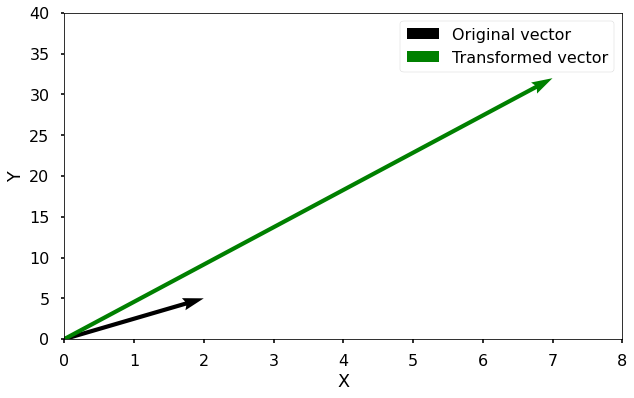

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
def plot_vect(x, b, xlim, ylim):
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
A = np.array([[1,1],[6,4]])
x = np.array([[2],[5]])
b = np.dot(A, x)
plot_vect(x,b,(0,8),(0,40))

We now get the eigenvalues for matrix [[0, 1], [2, -1]]. 

The characteristic equations gives us -λ(-1-λ) - 2 = λ^2 + λ - 2 = 0

Using the quadratic equation, we get λ = -2 of λ = 1

In [30]:
from numpy import linalg as LA
a = [[0,1],[2,-1]]
print(LA.eigvals(a))

[ 1. -2.]


We now find the eigenvectors for the eqigenvalues.

We first substitute λ = -2.

We get 2x1 + x2 = 0, indicating x2 = -2x1, so the first eigenvetor x1 = k1[1, -2]

We now substitue λ = 1.

We get x1 = x2, so x2 = k2[1,1]

We now use the QR function to decompose matrix A=[[1,4],[2,2]].

In [32]:
import numpy as np
from numpy.linalg import qr
a = np.array([[1, 4], 
              [2, 2]])
q, r = qr(a)
print('Q:', q)
print('R:', r)
b = np.dot(q, r)
print('QR:', b)

Q: [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
R: [[-2.23606798 -3.57770876]
 [ 0.         -2.68328157]]
QR: [[1. 4.]
 [2. 2.]]


We now use the QR method to get the eigenvalues of the above matrix and print the results of the first, fifth, tenth, and twentieth iterations.

In [33]:
a = np.array([[1, 4], 
              [2, 2]])
p = [1, 5, 10, 20]
for i in range(20):
    q, r = qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[ 4.2  0.4]
 [ 2.4 -1.2]]
Iteration 5:
[[ 4.37948327 -1.97906901]
 [ 0.02093099 -1.37948327]]
Iteration 10:
[[ 4.37225918e+00  2.00006359e+00]
 [ 6.35869136e-05 -1.37225918e+00]]
Iteration 20:
[[ 4.37228132e+00  2.00000000e+00]
 [ 5.89822916e-10 -1.37228132e+00]]


We now consider the artificial data created by x = np.linspace(0, 1, 101) and y = 1 + x + x * np.random.random(len(x)) and do a least squares regression with an estimation function defined by y^=α1x+α2.

[[1.5556009 ]
 [0.97352745]]


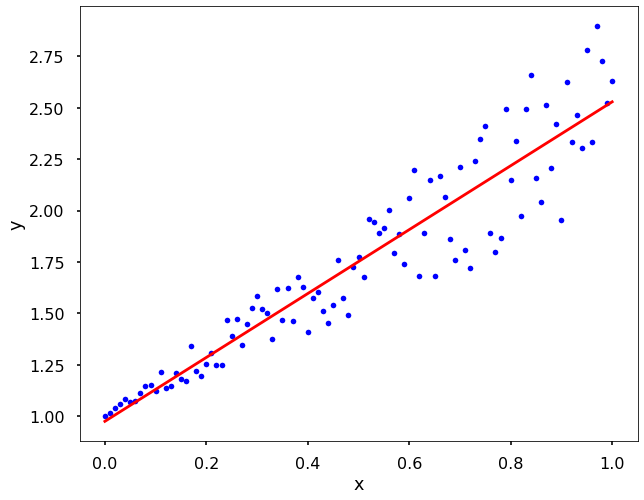

In [34]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can also use the psuedoinverse, i.e. ((A^TA)^-1)A^T

In [35]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.5556009 ]
 [0.97352745]]
